## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline



## Get the data



In [4]:
data = pd.read_csv('Volve.csv',index_col=0,parse_dates=True)

In [5]:
data.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [7]:
# Check missing values

data.isna().sum()

onstreaminject_HRS                0
BORE_WI_VOL                       0
ON_STREAM_HRS                     0
AVG_DOWNHOLE_PRESSURE             0
AVG_DOWNHOLE_TEMPERATURE          0
AVG_DP_TUBING                     0
AVG_ANNULUS_PRESS                 0
AVG_CHOKE_SIZE_P in percentage    0
AVG_WHP_P                         0
AVG_WHT_P                         0
DP_CHOKE_SIZE                     0
BORE_OIL_VOL                      0
BORE_GAS_VOL                      0
BORE_WAT_VOL                      0
dtype: int64

## Visualize the data


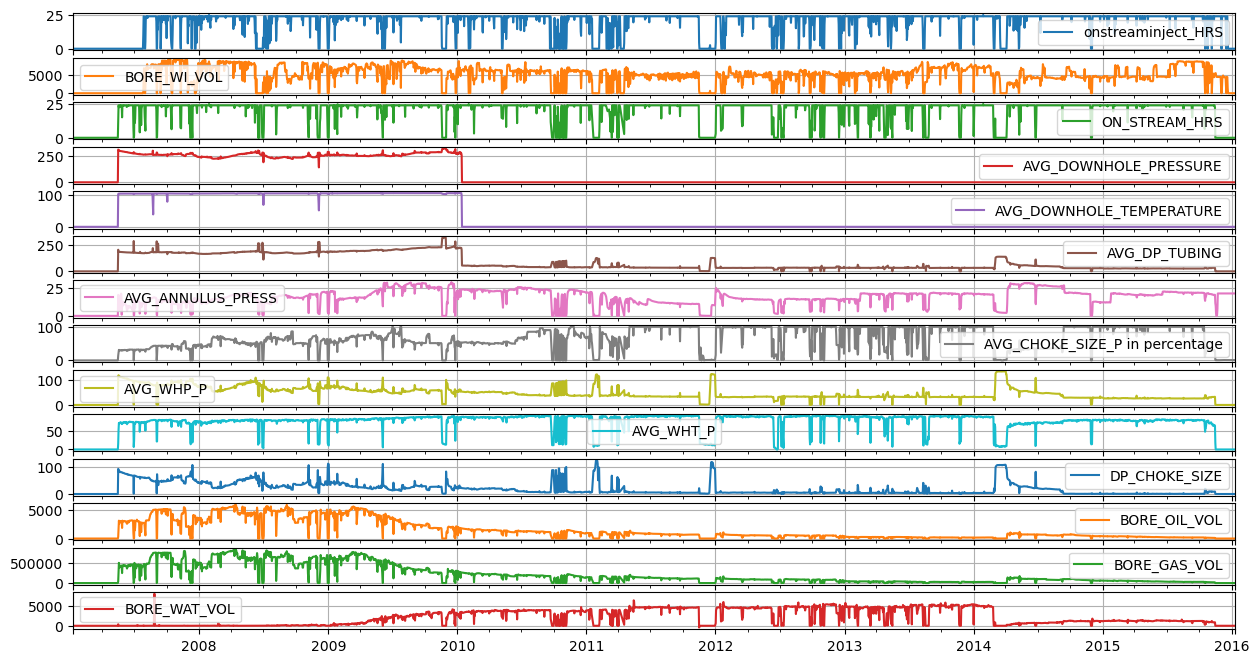

In [9]:
plt.style.use('default')
data.plot(subplots=True,figsize=(15,8), grid=True)
plt.show()

## Visualize the correlation between variables

<AxesSubplot:>

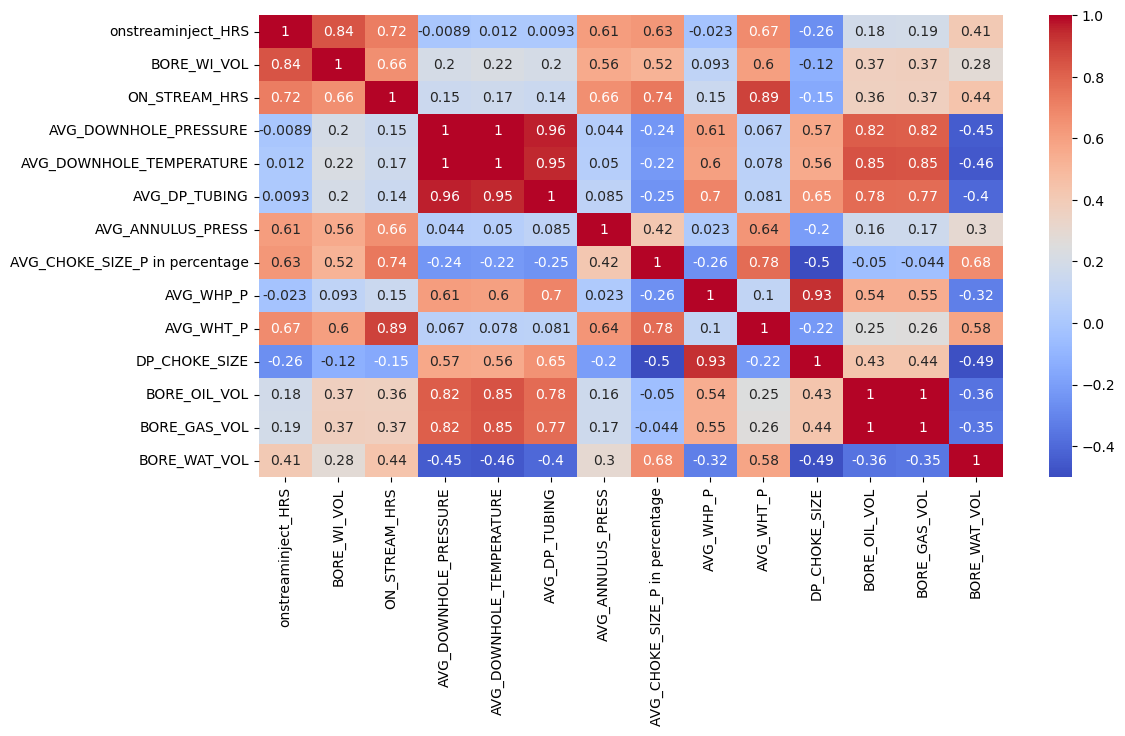

In [13]:
corr = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')


## Let's Visualize the correlation between the target variable and feature variables

<AxesSubplot:>

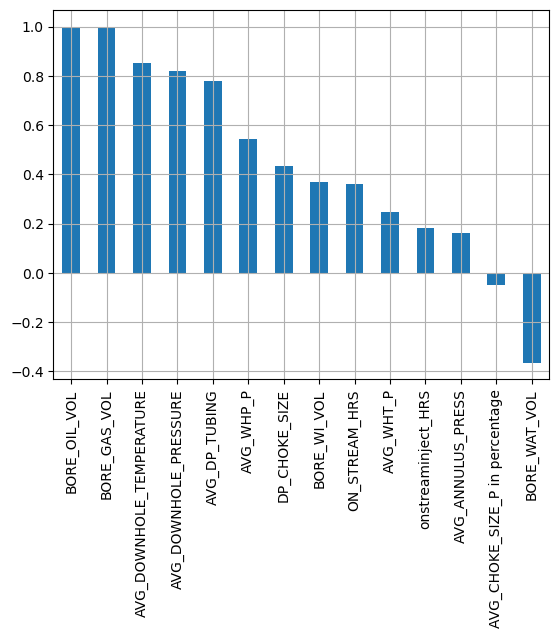

In [16]:
corr['BORE_OIL_VOL'].sort_values(ascending=False).plot(kind='bar', grid=True)

## Input Columns : Selecting features with good (but not extreme) correlations with target variables

In [23]:
# X = features 
# Y = target

X = data.drop(['BORE_GAS_VOL','BORE_OIL_VOL','AVG_CHOKE_SIZE_P in percentage','BORE_WAT_VOL'], axis=1).values

In [24]:
Y = data['BORE_OIL_VOL'].values

## Train Test split

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

# Train the RandomForestRegressor model 

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

## Test and Evaluation of model

In [27]:
predict_target = model.predict(x_test)

In [28]:
score = model.score(x_test,y_test)

In [29]:
print(score*100)

98.19513232949954


# The model is 98% accurate

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual values')

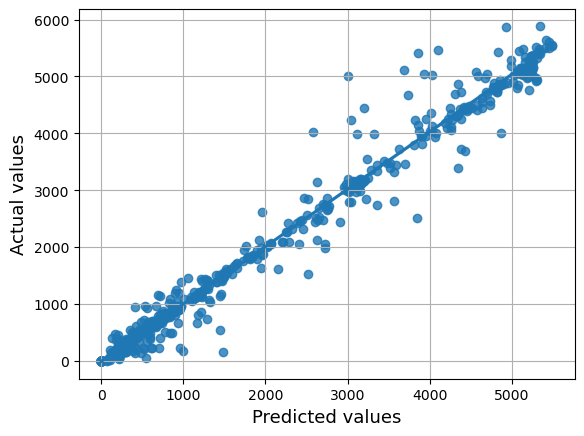

In [31]:
plt.grid()
sns.regplot(predict_target,y_test)
plt.xlabel('Predicted values', size=13)
plt.ylabel('Actual values', size=13)